In [1]:
import sympy as sym

sym.init_printing()


In [2]:
import numpy as np
import opt_mo


In [57]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")
q_1, q_2, q_3, q_4 = sym.symbols("q_1, q_2, q_3, q_4")


In [58]:
p, q = (p_1, p_2, p_3, p_4), (q_1, q_2, q_3, q_4)


In [59]:
ps = np.array(p)


The derivative of a quadratic form 
-----------------------------------------

Based on the blog post [The derivative of a quadratic form](http://michael.orlitzky.com/articles/the_derivative_of_a_quadratic_form.xhtml).
Let,

$$f(x) = x^T A x$$
then 
$$f'(x)= 2x^TA$$

we can prove that

$$ (p Q p^T)' = 2pQ.$$

In [60]:
Q = opt_mo.mem_quadratic_numerator(q)


In [61]:
expr = np.dot(ps, Q.dot(ps.T)).simplify()


In [62]:
lhs = [sym.diff(expr, i).factor() for i in p]


In [63]:
rhs = sym.Matrix(np.dot(p, Q) * 2)


In [64]:
[(lhs[i] - rhs[i]).simplify() for i, _ in enumerate(p)]


Secondy we need to verify that

$$ (cp)' = c$$

In [65]:
c = opt_mo.mem_linear_numerator(q)


In [76]:
expr = np.dot(c, ps)


In [77]:
lhs = [sym.diff(expr, i) for i in p]


In [78]:
[(lhs[i] - c[i]) for i, _ in enumerate(p)]


In [18]:
Q_den = opt_mo.mem_quadratic_denominator(q)


In [7]:
rows = [i.simplify() for i in np.dot(p, Q)]


In [8]:
product = (
    np.dot(p, Q) + opt_mo.mem_linear_numerator(q)
) * opt_mo.mem_constant_denominator(q)


In [10]:
product2 = (
    np.dot(p, Q_den) + opt_mo.mem_linear_denominator(q)
) * opt_mo.mem_constant_numerator(q)


In [11]:
(product[0] - product2[0]).factor()


In [12]:
(product[1] - product2[1]).factor()


In [13]:
(product[2] - product2[2]).simplify()


In [14]:
(product[3] - product2[3]).simplify()


In [19]:
rows2 = [i.simplify() for i in np.dot(p, Q_den)]


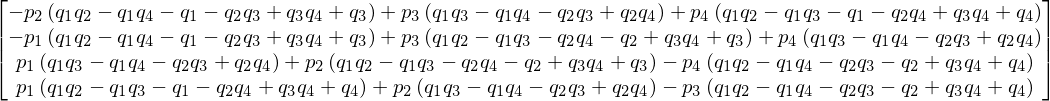

In [31]:
matrix = sym.Matrix(rows2)
matrix


In [29]:
p = np.array(p)


In [144]:
p.T


array([p_1, p_2, p_3, p_4], dtype=object)

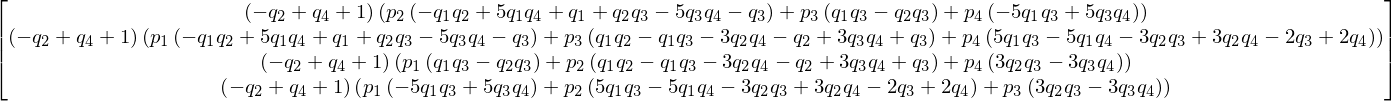

In [163]:
matrix = sym.Matrix(np.dot(p, Q))
matrix = matrix * opt_mo.mem_constant_denominator(q)
matrix


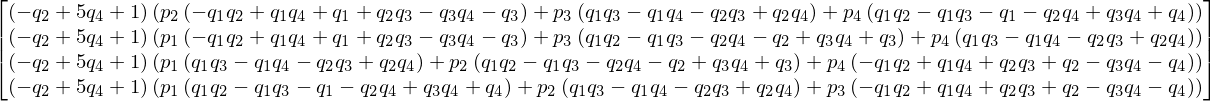

In [162]:
matrix2 = sym.Matrix(np.dot(p, Q_den))
matrix2 = matrix2 * opt_mo.mem_constant_numerator(q)
matrix2


In [167]:
(matrix[1] - matrix2[1]).factor()


In [177]:
(matrix[2] - matrix2[2]).simplify()


In [170]:
matrix3 = np.dot(c, opt_mo.mem_constant_denominator(q))
matrix3 = sym.Matrix(matrix3)


In [171]:
matrix4 = np.dot(d, opt_mo.mem_constant_numerator(q))
matrix4 = sym.Matrix(matrix4)


In [172]:
(matrix3[0] - matrix4[0]).factor()


In [178]:
sums = []
for i in range(4):
    sums.append((matrix[i] - matrix2[i]) + (matrix3[i] - matrix4[i]))


In [180]:
sums[0].factor()


In [182]:
sums[2].simplify()


In [67]:
c = opt_mo.mem_linear_numerator(q)
d = opt_mo.mem_linear_denominator(q)


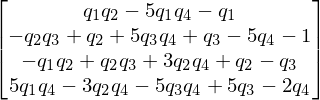

In [141]:
sym.Matrix(c)


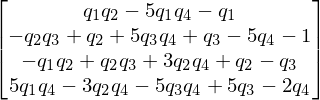

In [142]:
sym.Matrix(c.T)


In [78]:
x = np.dot(np.dot(Q_den, p), np.dot(c.T, p))
x = [i.factor() for i in x]
x = sym.Matrix(x)


In [109]:
x.shape


In [119]:
(Q_den * c.T).shape


In [120]:
y = np.dot(np.dot(p, Q), np.dot(d.T, p))
y = [i.simplify() for i in y]
y = sym.Matrix(y)


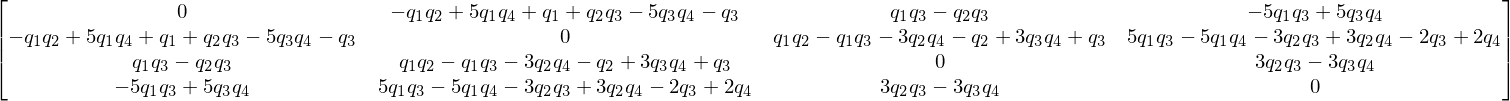

In [133]:
sym.Matrix(Q)


In [130]:
np.dot(c.T, p) - np.dot(c, p)


In [107]:
y = np.dot(Q_den * c.T, p).dot(p)
y


In [104]:
matrix = Q_den * c.T


In [106]:
np.dot(p, matrix).dot(q)


In [94]:
(y[0] - x[0]).factor()


TypeError: 'Add' object does not support indexing

**Example.** from Elementary Linear Algebra

In [137]:
x_1, x_2, x_3, x_4 = sym.symbols("x_1, x_2, x_3, x_4")


In [7]:
a_1, a_2, a_3, a_4, a_5, a_6 = sym.symbols("a_1, a_2, a_3, a_4, a_5, a_6")
b_1, b_2, b_3, b_4, b_5, b_6 = sym.symbols("b_1, b_2, b_3, b_4, b_5, b_6")


Let the polynomial

In [8]:
expr = (
    a_1 * x_1 ** 2
    + a_2 * x_2 ** 2
    + a_3 * x_3 ** 2
    + 2 * a_4 * x_1 * x_2
    + 2 * a_5 * x_1 * x_3
    + 2 * a_6 * x_2 * x_3
)
expr


This can be writen as a quadratic form.

In [9]:
x = np.array([x_1, x_2, x_3])


In [10]:
Q = np.array([[a_1, a_4, a_5], [a_4, a_2, a_6], [a_5, a_6, a_3]])


In [12]:
quadratic_form = np.dot(x, np.dot(Q, x.T))
quadratic_form


In [14]:
(expr - quadratic_form).simplify()


Computing the derivatives in two ways.

In [16]:
derivatives = [sym.diff(quadratic_form, i) for i in x]
derivatives


In [21]:
derivatives_quadratic = [sum(row) for row in (2 * Q * x)]


In [22]:
[derivatives[i] - derivatives_quadratic[i] for i in range(3)]


The derivative of a ratio of two quadratic forms
------------------------------------------------

Write a second polynomial.

In [24]:
expr_two = (
    b_1 * x_1 ** 2
    + b_2 * x_2 ** 2
    + b_3 * x_3 ** 2
    + 2 * b_4 * x_1 * x_2
    + 2 * b_5 * x_1 * x_3
    + 2 * b_6 * x_2 * x_3
)
expr_two


Write as a quadratic form.

In [25]:
x_bash = np.array([x_1, x_2, x_3])


In [26]:
Q_bash = np.array([[b_1, b_4, b_5], [b_4, b_2, b_6], [b_5, b_6, b_3]])


In [29]:
quadratic_form_two = np.dot(x_bash, np.dot(Q_bash, x_bash.T))


In [30]:
(quadratic_form_two - expr_two).simplify()


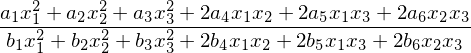

In [31]:
ratio_of_quadratics = (expr / expr_two).factor()
ratio_of_quadratics


In [33]:
derivatives_of_ratio = [sym.diff(ratio_of_quadratics, i) for i in x]


Let:
    $$u' = (\frac{xQx^T}{x\bar{Q}x^T})'$$
We will test if:
$$(\frac{xQx^T}{x\bar{Q}x^T})' = \frac{(xQx^T)'(x\bar{Q}x^T) - (xQx^T)(x\bar{Q}x^T)'}{(x\bar{Q}x^T)^2}$$

In [45]:
rhs = [
    sum(row)
    for row in (
        ((2 * x * Q) * (quadratic_form_two) - (2 * x_bash * Q_bash) * (quadratic_form))
        / quadratic_form_two ** 2
    )
]


In [166]:
sym.Matrix((2 * x * Q))


Nullifying the numerator
----------------------

Lets consider the numerator of $(\frac{xQx^T}{x\bar{Q}x^T})'$ to be $h(x)$.

$$h(x) = xQx\bar{Q}x^T x\bar{Q}xQx^T$$

Can we manipulate this?

In [138]:
x = np.matrix([x_1, x_2, x_3, x_4])
A = np.matrix(
    [[0, a_1, a_2, a_4], [a_1, 0, a_3, a_5], [a_2, a_3, 0, a_6], [a_4, a_5, a_6, 0]]
)
B = np.matrix(
    [[0, b_1, b_2, b_4], [b_1, 0, b_3, b_5], [b_2, b_3, 0, b_6], [b_4, b_5, b_6, 0]]
)


In [143]:
sym.Matrix(A * B) == sym.Matrix(B * A)


False

Can we take $xx^T$ out? Thus is:

$$ xAxBx^T = xAB xx^T$$ 

In [205]:
sym.Matrix(x * x.T)


In [204]:
rhs = sum(sym.Matrix(x * A) * sym.Matrix(x * B * x.T)[0]).factor()
rhs


In [210]:
lhs = sym.Matrix(x * (A * B)) * (x_1 ** 2 + x_2 ** 2 + x_3 ** 2 + x_4 ** 2)
lhs = sum(lhs).factor()


In [214]:
(rhs - lhs).simplify()


The assumption fails.

Lets me take a looks at $xA B$

In [220]:
expr = sum(sym.Matrix(x * (A * B)))


In [237]:
expr


In [236]:
x.T * x


matrix([[x_1**2, x_1*x_2, x_1*x_3, x_1*x_4],
        [x_1*x_2, x_2**2, x_2*x_3, x_2*x_4],
        [x_1*x_3, x_2*x_3, x_3**2, x_3*x_4],
        [x_1*x_4, x_2*x_4, x_3*x_4, x_4**2]], dtype=object)

Our problem and it's formulation
----------------------------------

The quadratic form of our problem has also a linear and a constant part.
Thus our function is:

$$u = \frac{xQx^T + c^Tx + a}{x\bar{Q}x^T + \bar{c}^Tx + \bar{a}}$$

Thus the derivative is:

$$u' = \frac{(xQx^T + c^Tx + a)' (x\bar{Q}x^T + \bar{c}^Tx + \bar{a}) - (x\bar{Q}x^T + \bar{c}^Tx + \bar{a})'(xQx^T + c^Tx + a)}{(x\bar{Q}x^T + \bar{c}^Tx + \bar{a})^2}$$


$$\Rightarrow \frac{(2xQ + c^T) (x\bar{Q}x^T + \bar{c}^Tx + \bar{a}) - (2x\bar{Q} + \bar{c}^T)(xQx^T + c^Tx + a)}{(x\bar{Q}x^T + \bar{c}^Tx + \bar{a})^2}$$

$$ \Rightarrow \frac{2(pQp\bar{Q}p^T - p\bar{Q}pQp^T) + 2(pQ\bar{a} - p\bar{Q}a) + (pQ\bar{c}^Tp^T -p\bar{Q}c^Tp^T) - (c^T\bar{a} - \bar{c}^Ta)}{(x\bar{Q}x^T + \bar{c}^Tx + \bar{a})^2}$$

Tha matrices we are handelling.

In [238]:
q_1, q_2, q_3, q_4 = sym.symbols("q_1, q_2, q_3, q_4")


In [239]:
q = [q_1, q_2, q_3, q_4]


In [88]:
Q = np.array(
    [
        [
            0,
            -q[0] * q[1]
            + 5 * q[0] * q[3]
            + q[0]
            + q[1] * q[2]
            - 5 * q[2] * q[3]
            - q[2],
            q[0] * q[2] - q[1] * q[2],
            -5 * q[0] * q[2] + 5 * q[2] * q[3],
        ],
        [
            -q[0] * q[1]
            + 5 * q[0] * q[3]
            + q[0]
            + q[1] * q[2]
            - 5 * q[2] * q[3]
            - q[2],
            0,
            q[0] * q[1] - q[0] * q[2] - 3 * q[1] * q[3] - q[1] + 3 * q[2] * q[3] + q[2],
            5 * q[0] * q[2]
            - 5 * q[0] * q[3]
            - 3 * q[1] * q[2]
            + 3 * q[1] * q[3]
            - 2 * q[2]
            + 2 * q[3],
        ],
        [
            q[0] * q[2] - q[1] * q[2],
            q[0] * q[1] - q[0] * q[2] - 3 * q[1] * q[3] - q[1] + 3 * q[2] * q[3] + q[2],
            0,
            3 * q[1] * q[2] - 3 * q[2] * q[3],
        ],
        [
            -5 * q[0] * q[2] + 5 * q[2] * q[3],
            5 * q[0] * q[2]
            - 5 * q[0] * q[3]
            - 3 * q[1] * q[2]
            + 3 * q[1] * q[3]
            - 2 * q[2]
            + 2 * q[3],
            3 * q[1] * q[2] - 3 * q[2] * q[3],
            0,
        ],
    ]
)


In [89]:
Q_d = np.array(
    [
        [
            0,
            -q[0] * q[1] + q[0] * q[3] + q[0] + q[1] * q[2] - q[2] * q[3] - q[2],
            q[0] * q[2] - q[0] * q[3] - q[1] * q[2] + q[1] * q[3],
            q[0] * q[1] - q[0] * q[2] - q[0] - q[1] * q[3] + q[2] * q[3] + q[3],
        ],
        [
            -q[0] * q[1] + q[0] * q[3] + q[0] + q[1] * q[2] - q[2] * q[3] - q[2],
            0,
            q[0] * q[1] - q[0] * q[2] - q[1] * q[3] - q[1] + q[2] * q[3] + q[2],
            q[0] * q[2] - q[0] * q[3] - q[1] * q[2] + q[1] * q[3],
        ],
        [
            q[0] * q[2] - q[0] * q[3] - q[1] * q[2] + q[1] * q[3],
            q[0] * q[1] - q[0] * q[2] - q[1] * q[3] - q[1] + q[2] * q[3] + q[2],
            0,
            -q[0] * q[1] + q[0] * q[3] + q[1] * q[2] + q[1] - q[2] * q[3] - q[3],
        ],
        [
            q[0] * q[1] - q[0] * q[2] - q[0] - q[1] * q[3] + q[2] * q[3] + q[3],
            q[0] * q[2] - q[0] * q[3] - q[1] * q[2] + q[1] * q[3],
            -q[0] * q[1] + q[0] * q[3] + q[1] * q[2] + q[1] - q[2] * q[3] - q[3],
            0,
        ],
    ]
)


**Check if commulitive multiplication works for our matrices.**
I know I am just copying code in here but I will package the matrices so I can just call them.

In [241]:
matrix = sym.Matrix(Q) * sym.Matrix(Q_d)


In [242]:
matrix_two = sym.Matrix(Q_d) * sym.Matrix(Q)


In [243]:
matrix_two == matrix.T


True

Calculate the $\bar{c}a - c\bar{a}$ part.

In [244]:
c = np.array(
    [
        q[0] * q[1] - 5 * q[0] * q[3] - q[0],
        -q[1] * q[2] + q[1] + 5 * q[2] * q[3] + q[2] - 5 * q[3] - 1,
        -q[0] * q[1] + q[1] * q[2] + 3 * q[1] * q[3] + q[1] - q[2],
        5 * q[0] * q[3] - 3 * q[1] * q[3] - 5 * q[2] * q[3] + 5 * q[2] - 2 * q[3],
    ]
)
a = -q[1] + 5 * q[3] + 1


In [245]:
d = np.array(
    [
        q[0] * q[1] - q[0] * q[3] - q[0],
        -q[1] * q[2] + q[1] + q[2] * q[3] + q[2] - q[3] - 1,
        -q[0] * q[1] + q[1] * q[2] + q[1] - q[2] + q[3],
        q[0] * q[3] - q[1] - q[2] * q[3] + q[2] - q[3] + 1,
    ]
)
b = -q[1] + q[3] + 1


In [246]:
rows = [i.simplify() for i in (c * b - d * a)]


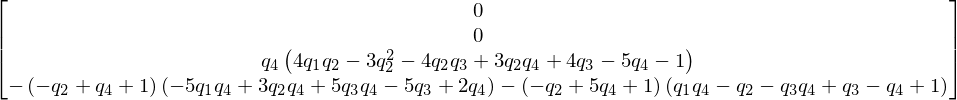

In [248]:
sym.Matrix(rows)
